# 16 MeV D on Ta Experimental Notebook

This experiment ran 16 MeV deuterons on Ta in the vault.  Two experimental setups were arranged in Cave 02.  The experimental goals were:

1) Test run for the ETA measurements on 24-26 Feb <br\>
2) Pulse height spectum unfolding of the neutron spectrum <br\>
3) Low energy light yield measurement on EJ-309 and EJ-299 <br\>


This experiment ran 1 EJ-309 and 1 EJ-299 scintillator detector. 

This notebook describes all of the steps required to take experimental data, parse that data, perform pulse shape discrimination (PSD) cuts, calibrate the data, and generate a pulse height spectrum (PHS) for unfolding of the 16 MeV on Ta spectrum.  It does not describe the dTOF light yield measurements, analysis, or setup.  
 
The notebook is broken into the following sections: <br\>
1) Experimental Setup <br\>
2) Aquire Calibration Data <br\>
3) Calibration Post-Processing <br\>
4) Perform Calibrations <br\>
5) Experimental Data Acquisition <br\>
6) Pulse Height Spectrum Post-Processing <br\>
7) EJ309 Spectrum Unfolding <br\>

At the start of each section, all of the modules necessary for that section are imported so that each can be run independently of the rest of the notebook (to the extent that the required inputs from previous sections exist). 

## 1) Experimental Setup

### Initial Setup of DAQ

The DAQ was run in pulse-amplitude mode. 

Power on CAEN NV8020 and CAEN 8315 power supplies on the digital DAQ for the E-J309 and EJ-299 targets. 

Open up terminal and launch the DPP_PSD app by typing:
DPP-PSD_ControlSoftware

Connect the DAQ by presing the connect button.  The connection type is USB, and the base address is 32100000.

### Detector Configuration

The detectors were set up as shown in the figure below:

<img src="Pics/UnfoldSetup.jpg">

The detectors were placed at the following coordinates (measured to the face of the detector from the wall):

EJ-309 (Tgt0): (46.9,0,0) cm <br\>
EJ-309 (Tgt0): (46.9,0,-2.5) cm <br\>

The connections were made as follows (no terminations were made on the output of the detectors):

Detector   | PMT Data Out | Junction Data | Junction HV | HV Ch # | DAQ Ch #  
---------- |:------------:|:-------------:|:-----------:|:-------:|:--------:
EJ309 Tgt  |A1            |30             |50 (HV1)     |0        |0
Ej299 Tgt  |A1            |31             |51 (HV2)     |1        |1 

### Setting Configuration

#### Set Gain
To determine the neutron (proton) energy to MeVee conversion, lightTables.getLight(neutron_energy,particle) was used from the nsd-rootscripts repo.  For this calibration, the max neutron energy is ~16 MeV. The max Be neutron energy is ~ 10 MeV.  

lightTables.getLight(16,0) = 8.9 MeVee
lightTables.getLight(10,0) = 4.9 MeVee. 

The edge of the 4.4 MeV AmBe gamma was set to be at ~0.9V and the edge of the AmBe neutrons at channel ~1600 for the PSD. 

**NOTE: Both the oscope and PSD must be scaled to ensure that the capture the full scale range (FSR) of the intended experiment.  There are two nobs to do this:**

1) Bias - The higher the bias the better the PSD [affects both] <br/>
2) Charge Sensitivity (on the channels tab) - Reduces the resolution, but allows for a wider FSR [only affects PSD]

#### Determine PSD Settings

After setting the gain the PSD gates and delays were set.  The best settings were determined to be:

Detector   | DAQ Ch# | Bias | Charge Sens | Short Gate | Long Gate | Gate Offset | Threshold | BL  | Trigger Holdoff  
---------- |:-------:|:----:|:-----------:|:----------:|:---------:|:-----------:|:---------:|:---:|:---------------:
EJ309 Tgt  |0        |1375V |20           |60          |500        |24           |175        |1024 |500
EJ299 Tgt  |1        |1750V |20           |60          |600        |24           |200        |1024 |600

These are also saved as 16MeVTa_Unfolding_DppConfig_23Feb17.txt in the 16MeVTa_24-26Feb17 folder on the DAQ.


## 2) Acquire Calibration Data
Click on the Output tab.  Select a file location and name.  Select list, and binary format.  Finally turn dumping on.

The targets were calibrated together with one source at a time.  The times were set to get ~ 1000 counts/bin at the compton edge in with 4k bins. The following total events were stored for each calibration source:

### Calibration #1

EJ-309 Target:

Source | Events | Time (min) | File name          
------ |:------:|:----------:|:------------------:
AmBe   |        |~30 min     |AmBe_000_ls_0.dat
Co60   |380k    |~20 min     |Co60_000_ls_0.dat
Cs137  |250k    |~11 min     |Cs137_000_ls_0.dat

EJ-299 Target:

Source | Events | Time (min) | File name  
------ |:------:|:----------:|:-----------------:
AmBe   |        |~30 min     |AmBe_000_ls_1.dat
Co60   |380k    |~20 min     |Co60_000_ls_1.dat
Cs137  |460k    |~11 min     |Cs137_000_ls_1.dat

The files are stored on the DAQ in the 16MeVTa_24-26Feb17/Unfolding/CalibrationData folder. 

### Calibration #2
A second set of calibration data was takenn just prior to the run to test for drift. The calibration source was placed on Target 1 (EJ-299).

EJ-309 Target:

Source | Start | Time (min) | File name          
------ |:------:|:----------:|:------------------:
AmBe   |1743    |312 sec     |AmBe_001_ls_0.dat
Cs137  |1749    |300 sec     |Cs137_001_ls_0.dat
Bkgrnd |1755    |600 sec     |Background_001_ls_0.dat

EJ-299 Target:

Source | Start | Time (min) | File name          
------ |:------:|:----------:|:------------------:
AmBe   |1743    |312 sec     |AmBe_001_ls_1.dat
Cs137  |1749    |300 sec     |Cs137_001_ls_1.dat
Bkgrnd |1755    |600 sec     |Background_001_ls_1.dat

### Calibration #3 
Ringing was noticed in the EJ-299 when the beam was turned on, so a terminator was added.  Also, the full energy peaks were slightly off scale so the gains were changed.  The calibration sources were placed on Taget 1 (EJ-299). The following were used:

Detector   | DAQ Ch# | Bias | Charge Sens | Short Gate | Long Gate | Gate Offset | Threshold | BL  | Trigger Holdoff  
---------- |:-------:|:----:|:-----------:|:----------:|:---------:|:-----------:|:---------:|:---:|:---------------:
EJ309 Tgt  |0        |1325V |20           |60          |500        |24           |175        |1024 |500
EJ299 Tgt  |1        |1850V |20           |60          |600        |24           |200        |1024 |600

EJ-309 Target:

Source | Start | Time (min) | File name          
------ |:------:|:----------:|:------------------:
AmBe   |1843    |600 sec     |AmBe_002_ls_0.dat
Cs137  |1854    |600 sec     |Cs137_002_ls_0.dat
Bkgrnd |1905    |300 sec     |Background_002_ls_0.dat

EJ-299 Target:

Source | Start | Time (min) | File name          
------ |:------:|:----------:|:------------------:
AmBe   |1843    |600 sec     |AmBe_002_ls_0.dat
Cs137  |1854    |600 sec     |Cs137_002_ls_0.dat
Bkgrnd |1905    |300 sec     |Background_002_ls_0.dat

### Post Run Calibration  -- USE THIS SET FOR THE CALIBRATION
EJ-309 Target:

Source | Start | Time (min) | File name          
------ |:------:|:----------:|:------------------:
AmBe   |1902    |300 sec     |AmBe_003_ls_0.dat
Cs137  |2057    |300 sec     |Cs137_003_ls_0.dat
Co60   |2046    |600 sec     |Co60_003_ls_0.dat

EJ-299 Target:

Source | Start | Time (min) | File name          
------ |:------:|:----------:|:------------------:
AmBe   |1902    |300 sec     |AmBe_003_ls_1.dat
Cs137  |2057    |300 sec     |Cs137_003_ls_1.dat
Co60   |2046    |600 sec     |Co60_003_ls_1.dat

## 3) Calibration Post-Processing:

The rest of this notebook is both descriptive and interactive.  Choose which step to perform in the notebook, or you can run them in root.  NOTE: If using this notebook as a guide to a different data set, check each of variables and commands to make sure they make sense in the context of your data set.

To use the interactive commands, Root must be installed and PyRoot enabled for this notebook to work. Make sure that $ROOTSYS/lib is in your PYTHONPATH and LD_LIBRARY_PATH variables.

First, load the necessary libraries, set the appropriate environment variables, and compile the C++ support macros from the instructions @ https://bitbucket.org/berkeleylab/nsd-rootscripts/wiki/LibraryCompilation.

Next, The notebook has dependencies on PScripts, which can be cloned from:
https://github.com/jamesbevins/PyScripts

In [39]:
import sys
import os
from ROOT import gROOT

sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/Support'))
from Utilities import pause

path = '/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Calibration/'
os.chdir(path)
print 'Currently working in: \n {}'.format(os.getcwd())

Currently working in: 
 /home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Calibration


### Convert Binaries to root trees

The following gROOT commands can be copied and run directly in ROOT if preferred.  

Loop over all of the calibration .dat files, convert to .root Trees, and add them to a combined Calibrations.root tree.  

In [2]:
gROOT.ProcessLine('DPPBinaryParser parser;')
gROOT.ProcessLine('vector<string> names;')

for filename in os.listdir(path):
    if filename.endswith(".dat"): 
        name = os.path.splitext(filename)[0]
        print "Processing: ", name
        gROOT.ProcessLine('parser.readDatFile("{0}.dat", "{0}.root");'.format(name))
        gROOT.ProcessLine('names.push_back("{0}.root");'.format(name))
        
gROOT.ProcessLine('DDaqPostProcessing obj;')
gROOT.ProcessLine('obj.makePhCalibs(names,"Calibrations.root");')

0L

### Test Gain Drift

This looks at the gain drift across the experiment by using before and after calibrations from one of the sources.

** NOTE: Since the gains changed between calibration set 001 and 002, only 002 and 003 are used. **

In [41]:
detNames = {0: 'EJ309', 1: 'EJ299'}

In [3]:
driftSrc = 'Cs137'
runNums = ['002', '003']
colorWheel = ['kGreen', 'kBlue']

gROOT.ProcessLine('TFile f("Calibrations_All.root")')
gROOT.ProcessLine('TLine* line = new TLine(0,1,7000,1)')

for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('TCanvas c{}'.format(detNum))
    for run, color in zip(runNums, colorWheel):
        gROOT.ProcessLine('TH1* {0}_{1} = (TH1*) f.Get("{2}_{1}_ls_{3}.root")->Clone()'.format(detName, run, driftSrc, detNum))
        gROOT.ProcessLine('{0}_{1}->Scale(1.0/{0}_{1}->Integral())'.format(detName, run))
        gROOT.ProcessLine('{0}_{1}->Rebin(2)'.format(detName, run))
        gROOT.ProcessLine('{0}_{1}->SetLineColor({2})'.format(detName, run, color))
        gROOT.ProcessLine('{0}_{1}->Draw("same")'.format(detName, run))
        
    gROOT.ProcessLine('TH1* postToPreRatio{0} = (TH1*){0}_{1}->Clone()'.format(detName, runNums[-1]))
    gROOT.ProcessLine('postToPreRatio{0}->Divide({0}_{1})'.format(detName, runNums[-2]))
    gROOT.ProcessLine('TCanvas c{}'.format(detName))
    gROOT.ProcessLine('postToPreRatio{0}->Draw()'.format(detName))
    gROOT.ProcessLine('line->Draw("same")')
    pause()

#### Detector 0 (EJ309)

<img src="Pics/PrePostCalibComp0.png">
<img src="Pics/PrePostCalibRatio0.png">

#### Detector 1 (EJ299)

<img src="Pics/PrePostCalibComp1.png">
<img src="Pics/PrePostCalibRatio1.png">

### Make PSD cuts on AmBe

To perform the calibration, it is necessary to toss out the neutron data from the AmBe data.  Here a linear cut is used since the compton edge is cleaned separated from the neutron band.  psdplotfitter.h has some more advanced options if needed.

Each of the gROOT commands can be copied and run directly in ROOT if desired.

First draw the PSD reducing the number of bins in both directions for the calibration run:

In [42]:
# Set file characteristics
runNum = "003"

# Initialize storage        
# Plot each PSD
for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('TFile *AmBe{0} = new TFile("AmBe_{1}_ls_{0}.root","update")'.format(detNum,runNum))
    gROOT.ProcessLine('eventTree->Draw("(m_amplitude-m_shape)/m_amplitude:m_amplitude>>(2500,0,35000,1024,0,1)","","colz")')
    
    gROOT.ProcessLine('TFile *{0} = new TFile("CalibData_{1}.root","recreate")'.format(detName, detNum))
    pause()

Press enter to continue
Press enter to continue


This will open a PSD plot.  

Right click and click SetShowProjectY.  This opens a new canvas.  On the original PSD canvas, you can select different projections which are plotted on the right.  use this to find the location of the minima between the neutron and gamma band.  In this case it is ~0.18 for channel 0 (EJ-309) and ~0.21 (EJ-299) for channel 1.

You can now view those cuts to ensure they are appropriate:

In [4]:
cutPt={0: 0.18, 1: 0.21}
for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('AmBe{}->cd()'.format(detNum))
    #gROOT.ProcessLine('eventTree->Draw("(m_amplitude-m_shape)/m_amplitude:m_amplitude>>(2500,0,35000,1024,0,1)","(m_amplitude-m_shape)/m_amplitude<{}","colz")'.format(cutPt[detNum]))
    pause()

Press enter to continue
Press enter to continue


Now we can save the cuts.  This generates a gamma histogram and saves it to the current file.

In [5]:
for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('AmBe{}->cd()'.format(detNum))
    gROOT.ProcessLine('eventTree->Draw("m_amplitude>>AmBeGamma(2500,0,35000)","(m_amplitude-m_shape)/m_amplitude<{}")'.format(cutPt[detNum]))
    gROOT.ProcessLine('TH1F* AmBeData{0} = (TH1F*) AmBe{0}->Get("AmBeGamma")'.format(detNum))
    gROOT.ProcessLine('AmBe{0}->Write()'.format(detNum))
    pause()
    
    gROOT.ProcessLine('{0}->cd()'.format(detName))
    gROOT.ProcessLine('AmBeData{}->Write()'.format(detNum))
    gROOT.ProcessLine('AmBe{}->Close()'.format(detNum))

Press enter to continue
Press enter to continue


### Combine the Calibration Data Files

Next, the experimental claibration files need to be combined into a single TFile for each channel. Only the pre-experimental calibration data set specified above is included.  

This loops over all of the root trees in the directory and combines them by channel number.  It assumes that the standard DAQ naming format is used.  The first prefix assumes that the names of "Co60" and "Cs137" are used for the calibration data of those isotopes.

After each data set is read it, the script pauses to allow inspection of the histogram.  The user is prompted to hit <enter> to continue. The histograms are

In [6]:
exclude = ["AmBe", "Background", "CalibData"]   #File prefixes for the current calibration run to exclude
tmpName = 'a'
for filename in os.listdir(path):
    if filename.endswith(".root") and os.path.splitext(filename)[0].split('_')[1] == runNum: 
        name = os.path.splitext(filename)[0]
        if name.split('_')[0] not in exclude:
            print "Adding: ", name

            gROOT.ProcessLine('TFile *{0} = new TFile("{1}.root","update")'.format(tmpName, name))
            gROOT.ProcessLine('eventTree->Draw("m_amplitude>>{0}(2500,0,35000)")'.format(name.split('_')[0]))
            gROOT.ProcessLine('TH1F* {0}Data{1} = (TH1F*) {2}->Get("{0}Data")'.format(name.split('_')[0], name.split('_')[3], tmpName))

            gROOT.ProcessLine('{}->cd()'.format(detNames[int(name.split('_')[3])]))
            gROOT.ProcessLine('{}->Write()'.format(name.split('_')[0]))
            
            gROOT.ProcessLine('{}->Close()'.format(tmpName))
            tmpName = chr(ord(tmpName) + 1)
            pause()       

Adding:  Co60_003_ls_1
Press enter to continue
Adding:  Cs137_003_ls_0
Press enter to continue
Adding:  Co60_003_ls_0
Press enter to continue
Adding:  Cs137_003_ls_1
Press enter to continue


In [7]:
# Close all of the files
for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('{}->Close()'.format(detName))

### Combine the Calibration Sim Files

Next, the simulated calibration files need to be combined into a single TFile.  These commands can be run through the python script, but it is probably easier to run from the command line, which is what was done.  

**NOTE: Order matters!  This must be the same order as the data files above.** <br\>
**NOTE: These are run from the cmd line in the directory the files reside, not from within Root.**

#### Commands to run: <br/>
rootcp AmBeDeposition.root:AmBeDeposition CalibSim.root:AmBeSim <br/>
rootcp NaCsCoGammas.root:Cs137 CalibSim.root:Cs137Sim <br/>
rootcp CoDeposition.root:CoDeposition CalibSim.root:Co60Sim <br/>

## 4) Perform Calibrations

Simulation Based Calibrations

Required:  <br/>
1) Vector of pointers to histograms of data  <br/>
2) Vector of pointers to histograms of simulations of that data in the same order  <br/>

To run the calibrations, use the start16MeVTaCalibrations_<detNum>.cpp script located in the Calibrations folder.  

**NOTE: The nsd-rootscripts repo contains an example that is similar but may differ. This script must be loaded first for both methods.**

This script contains user variables that must be modified.  For this mode, two methods are used and require modifications to the script:

1) startGuessSimCalib(): modify the file names <br/>
2) startSimCalibration(): modify the file names and each of the parameters  <br/>

It is recommended to use startGuessSimCalib() first; then use those parameters to use startSimCalibration with background subtraction.  However, if you have starting calibration and scale parameters, startSimCalibration() can be used without startGuessSimCalib().

### Detector 0

#### startGuessSimCalib

First load the script and run the method for detector 0:

In [1]:
import os
from ROOT import gROOT

path = '/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Calibration/'
os.chdir(path)
print 'Currently working in: \n {}'.format(os.getcwd())

gROOT.ProcessLine('.L start16MeVTaCalibration_0.cpp')

Currently working in: 
 /home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Calibration


0L

Launch the gui:

In [ ]:
gROOT.ProcessLine('obj0=startGuessSimCalib()')

Set the ranges and the good starting points using the GUI.

Then run the optimization routine in the cell below. 

Repeat the cell below until satified with the fit.

**NOTE: The plots should update.  From there, the ranges can be adjusted as necessary before running the optimization routine again. Ensure that no parameters are pegged to range limits.**

In [ ]:
gROOT.ProcessLine('obj0->findGammaCalibrationConstants()')

The fit obtained was:

<img src="Pics/16MeVTa_Det0PreCalib.png">

#### startSimCalib

Perform a more thorough calibration using the parameters found from above.  A power law fit is used for the background subtraction.

In [2]:
gROOT.ProcessLine('sim0=startSimCalibration()')

108710976L

In [ ]:
gROOT.ProcessLine('sim0->findGammaCalibrationConstants()')

In [ ]:
gROOT.ProcessLine('std::vector<double> params0 = sim0->findGammaCalibrationConstants()')
gROOT.ProcessLine('sim0->writeStateToDisk("CalibParams_0.txt")')

In [ ]:
gROOT.ProcessLine('sim0->getMinimizer()->Hesse()')

In [3]:
# Save the fit parameters locally for detector 0
params = {0: [4.97585e-04, 3.57267e-02, 4.11884e-02, 6.41424e-02, 9.08743e-04]}

## Plot Resolution function?

The calibration is saved as **CalibParams_0.txt**.  The fit obtained was:

<img src="Pics/16MeVTa_Det0Calib.png">

##### The minimization results:

EIGENVALUES OF SECOND-DERIVATIVE MATRIX: <br\>
        -2.9588e-02 -1.2373e-02  2.5746e-02  8.0445e-02  1.3221e-01  2.0510e-01  3.8429e-01  4.1188e-01  4.5906e-01  7.7790e-01  9.6512e-01  9.9914e-01  1.0038e+00  1.8586e+00  2.6252e+00  3.2564e+00  3.8571e+00

FCN=565.202 FROM HESSE     STATUS=NOT POSDEF    279 CALLS         280 TOTAL <br\>
                     EDM=0.19032    STRATEGY= 1      ERR MATRIX NOT POS-DEF <br\>
  EXT PARAMETER                APPROXIMATE     INTERNAL      INTERNAL   <br\>
  NO.   NAME      VALUE            ERROR       STEP SIZE       VALUE    <br\>
   1  a            4.97585e-04   2.71648e-07   2.68337e-04  -1.77102e-03 <br\>
   2  b            3.57267e-02   6.78383e-04   4.39910e-03  -5.67918e-01 <br\>
   3  Ec           4.11884e-02   1.67921e-03   1.25833e-02   3.45209e-01 <br\>
   4  E1           6.41424e-02   2.38256e-03   1.44392e-02  -5.71026e-01 <br\>
   5  E2           9.08743e-04   4.21799e-04   5.00000e-01   8.00252e-01 <br\>
   6  AmBeSim_scaler   1.32383e+05   1.13765e+03   2.02670e-03  -1.62056e-01 <br\>
   7  Cs137Sim_scaler   1.15384e+05   1.12532e+03   1.19428e-03  -3.97452e-01 <br\>
   8  Co60Sim_scaler   9.83205e+04   2.12376e+03   8.64060e-04  -4.98050e-01 <br\>
   9  AmBeSim Power Law - Scalar   1.50646e-01   1.00002e-02   2.79702e-03  -7.73590e-01 <br\>
  10  AmBeSim Power Law - Exponent  -4.31117e+00   5.85457e-02   8.39388e-04   1.38206e-01 <br\>
  11  AmBeSim Constant Background   9.53674e-06   1.14039e+00   2.63537e-01  -1.56884e+00 <br\>
  12  Cs137Sim Power Law - Scalar   1.06311e-03   1.54924e-04   1.04400e-03  -1.50557e+00 <br\>
  13  Cs137Sim Power Law - Exponent  -2.56594e-05   3.93465e-01   6.83559e-02   1.56759e+00 <br\>
  14  Cs137Sim Constant Background   9.90464e+00   1.24331e+01   2.74877e-01   3.26383e-01 <br\>
  15  Co60Sim Power Law - Scalar   5.73151e-04   1.29500e-04   1.02031e-03  -1.52291e+00 <br\>
  16  Co60Sim Power Law - Exponent  -4.11169e+00   3.93111e-01   3.43199e-03   1.78610e-01 <br\>
  17  Co60Sim Constant Background   1.02926e-06   3.86291e-01   5.00000e-01  -1.56777e+00 <br\>
  
 EXTERNAL ERROR MATRIX.    NDIM=  25    NPAR= 17    ERR DEF=1 <br\>
 ELEMENTS ABOVE DIAGONAL ARE NOT PRINTED. <br\>
  7.379e-14 -1.097e-10 1.328e-10 -1.287e-11 -6.004e-12 <br\>
 -1.097e-10  4.603e-07 -1.684e-07  7.232e-08 2.741e-08 <br\>
  1.328e-10 -1.684e-07  2.823e-06 -2.442e-06  1.094e-07  <br\>
 -1.287e-11  7.232e-08 -2.442e-06  5.684e-06 -2.070e-07  <br\>
 -6.004e-12  2.741e-08  1.094e-07 -2.070e-07  1.514e-05  <br\>
 
 PARAMETER  CORRELATION COEFFICIENTS   <br\>
       NO.  GLOBAL      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16 <br\>
        1  0.73611   1.000 -0.595  0.291 -0.020 -0.006  0.127  0.022  0.012 -0.167  0.125  0.083 -0.083  0.015 -0.011 -0.008  0.003 <br\>
        2  0.79817  -0.595  1.000 -0.148  0.045  0.010 -0.049 -0.149 -0.033  0.061 -0.040 -0.029  0.282 -0.060  0.036  0.084  0.088 <br\>
        3  0.80231   0.291 -0.148  1.000 -0.610  0.017  0.443 -0.243 -0.073  0.032 -0.234 -0.064  0.116  0.005  0.013  0.076  0.078 <br\>
        4  0.79202  -0.020  0.045 -0.610  1.000 -0.022 -0.051  0.500  0.315 -0.008  0.032  0.010 -0.255 -0.010 -0.030 -0.303 -0.293 <br\>
        5  0.05185  -0.006  0.010  0.017 -0.022  1.000  0.000  0.011  0.024 -0.001  0.001 -0.003 -0.004 -0.006  0.002 -0.024 -0.024 <br\>
        6  0.90976   0.127 -0.049  0.443 -0.051  0.000  1.000  0.016  0.065 -0.050 -0.372 -0.046 -0.009 -0.001 -0.001 -0.059 -0.055 <br\>
        7  0.87323   0.022 -0.149 -0.243  0.500  0.011  0.016  1.000  0.181  0.008 -0.017 -0.007 -0.473 -0.094 -0.061 -0.187 -0.183 <br\>
        8  0.98403   0.012 -0.033 -0.073  0.315  0.024  0.065  0.181  1.000  0.013 -0.043 -0.014 -0.103 -0.000 -0.012 -0.974 -0.947 <br\>
        9  0.97836  -0.167  0.061  0.032 -0.008 -0.001 -0.050  0.008  0.013  1.000 -0.884  0.054 -0.002  0.000 -0.000 -0.016 -0.018 <br\>
       10  0.98220   0.125 -0.040 -0.234  0.032  0.001 -0.372 -0.017 -0.043 -0.884  1.000 -0.103  0.008 -0.000  0.001  0.045  0.045 <br\>
       11  0.42630   0.083 -0.029 -0.064  0.010 -0.003 -0.046 -0.007 -0.014  0.054 -0.103  1.000  0.003 -0.000  0.000  0.016  0.016 <br\>
       12  0.95740  -0.083  0.282  0.116 -0.255 -0.004 -0.009 -0.473 -0.103 -0.002  0.008  0.003  1.000 -0.308 -0.708  0.119  0.119 <br\>
       13  0.71612   0.015 -0.060  0.005 -0.010 -0.006 -0.001 -0.094 -0.000  0.000 -0.000 -0.000 -0.308  1.000  0.063 -0.004 -0.004 <br\>
       14  0.92979  -0.011  0.036  0.013 -0.030  0.002 -0.001 -0.061 -0.012 -0.000  0.001  0.000 -0.708  0.063  1.000  0.014  0.014 <br\>
       15  0.99689  -0.008  0.084  0.076 -0.303 -0.024 -0.059 -0.187 -0.974 -0.016  0.045  0.016  0.119 -0.004  0.014  1.000  0.990 <br\>
       16  0.99354   0.003  0.088  0.078 -0.293 -0.024 -0.055 -0.183 -0.947 -0.018  0.045  0.016  0.119 -0.004  0.014  0.990  1.000 <br\>
       17  0.04251   0.002  0.003  0.000  0.002 -0.001  0.001  0.000  0.009 -0.000  0.000  0.000  0.001 -0.000  0.000 -0.016 -0.017 
                     1.000 <br\>

### Detector 1

#### startGuessSimCalib()

First load the script.

** NOTE: This is just a placeholder as the simualtions are for EJ-309, not EJ-299**

In [ ]:
from ROOT import gROOT

gROOT.ProcessLine('.L Calibration/start16MeVTaCalibration_1.cpp')
gROOT.ProcessLine('obj1=startGuessSimCalib()')

Save the results to file and create a local object with the optimization parameters.

In [ ]:
gROOT.ProcessLine('obj1->findGammaCalibrationConstants()')

The fit obtained was:

<img src="Pics/16MeVTa_Det0Calib.png">

#### startSimCalib

Perform a more thorough calibration using the parameters found from above.  A power law fit is used for the background subtraction.

In [2]:
gROOT.ProcessLine('sim1=startSimCalibration()')

108710976L

In [ ]:
gROOT.ProcessLine('sim1->findGammaCalibrationConstants()')

In [ ]:
gROOT.ProcessLine('std::vector<double> params1 = sim1->findGammaCalibrationConstants()')
gROOT.ProcessLine('sim1->getMinimizer()->Hesse()')
gROOT.ProcessLine('sim1->writeStateToDisk("CalibParams_1.txt")')

In [2]:
# Save the fit parameters locally for detector 0
params.update({1: [4.85621e-04, 3.50201e-02, 3.93118e-02, 7.61783e-02, 9.20844e-05]})

## 5) Experimental Data Acquisition:

All current monitor data is stored in: **Bevins_2H16+1_1914_24FEB17** in the 16MeVTa/Data. 

The current was ~500 $\mu$A. The current integrator was set to the 6E-7 Scale.  Two ~30 min runs were performed.

### Run #1
Start: 1921
Current integrator reading is 0 <br\>
Stop: 1954 <br\>
Current integrator reading is 1459 <br\>

### Run #2
Start: 1956 <br\>
Current integrator reading is 0 <br\>
Stop: 2027 <br\>
Current Integrator is 1370 <br\>

## 6) Pulse Height Spectrum Post-Processing:

These steps convert the experimental data to root files, makes a TChain combining the run data, applys PSD cuts, and generates a heprow formatted .phs file for use in unfolding.  

### Convert Data Files from Binary to Root

In [1]:
import sys
import os
from ROOT import gROOT

sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/Support'))
from Utilities import pause, remove_file

path = '/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Data/'
os.chdir(path)
print 'Currently working in: \n {}'.format(os.getcwd())

Currently working in: 
 /home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Data


In [ ]:
gROOT.ProcessLine('DPPBinaryParser parser;')

for filename in os.listdir(path):
    if filename.endswith(".dat"): 
        name = os.path.splitext(filename)[0]
        gROOT.ProcessLine('parser.readDatFile("{0}.dat", "{0}.root");'.format(name))

### Make PSD Cuts

To perform the unfolding, it is necessary to toss out the gamma data from the target data.  Here a simple linear cut with a slope is used.  psdplotfitter.h has some more advanced options if needed.

Each of the gROOT commands can be copied and run directly in ROOT if desired.

First draw the PSD reducing the number of bins in both directions for the calibration run:

In [ ]:
detNames = {0: 'EJ309'}#, 1: 'EJ299'}

# Plot each PSD
for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('TChain {0}("{0}")'.format(detName))
    gROOT.ProcessLine('{0}.Add("16MeVTaUnfoldingRun_*_ls_{1}.root/eventTree")'.format(detName, detNum))

    #gROOT.ProcessLine('{0}.Draw("(m_amplitude-m_shape)/m_amplitude:m_amplitude>>(17000,0,34000,1024,0,1)","","colz")'.format(detName))
    gROOT.ProcessLine('{0}.ls()'.format(detName))
    pause()

This will open a PSD plot.  Right click and click SetShowProjectY.  This opens a new canvas.  On the original PSD canvas, you can select different projections which are plotted on the right.  Use this to find the location of the minima between the neutron and gamma band. The cuts were then deveoped by fitting the curve of the gap between the distributions.  

In this case it is $2.28E-19*ch^4 - 2.07E-14*ch^3 + 6.89E-10*ch^2 - 1.01E-05*ch + 0.206$ for channel 0 (EJ-309). All channels below 400 were also cut.  

In this case it is $2.96E-19*ch^4 - 2.52E-14*ch^3 + 7.47E-10*ch^2 - 8.97E-06*ch + 0.236$ for channel 1 (EJ-299). All channels below 500 were also cut.  

You can now view those cuts to ensure they are appropriate:

In [5]:
cutLine = {0: "2.28E-19*m_amplitude^4 - 2.07E-14*m_amplitude^3 + 6.89E-10*m_amplitude^2 - 1.01E-05*m_amplitude + 0.206",
           1: "2.96E-19*m_amplitude^4 - 2.52E-14*m_amplitude^3 + 7.47E-10*m_amplitude^2 - 8.97E-06*m_amplitude + 0.236"}
cutCh = {0: 500, 1: 500}

for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('{0}.Draw("(m_amplitude-m_shape)/m_amplitude:m_amplitude>>(16000,0,32000,1024,0,1)","(m_amplitude-m_shape)/m_amplitude>{1} && m_amplitude>{2}","colz")'.format(detName, cutLine[detNum], cutCh[detNum]))
    pause()

Press enter to continue
Press enter to continue


### Save the Cuts

Generates a 1D neutron pulsse height histogram and saves it to the current file.

In [6]:
for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('TFile *tmp{0} = new TFile("{1}psdCutTgt{2}.root","recreate")'.format(detNum, path, str(detNum)))
    gROOT.ProcessLine('{0}.Draw("m_amplitude>>{0}Neutron(16000,0,32000)","(m_amplitude-m_shape)/m_amplitude>{1} && m_amplitude>{2}","colz")'.format(detName, cutLine[detNum], cutCh[detNum]))
    gROOT.ProcessLine('tmp{0}->Write()'.format(str(detNum)))
    pause()

Press enter to continue
Press enter to continue


### Apply Calibrations

params[detNum][0] is the slope of the calibration <br\>
params[detNum][1] is the intercept of the calibration

**NOTE: If the notebook has been restarted, the cell defining these parameters above in the Calibrations sections will need to be rerun. **

In [7]:
gROOT.ProcessLine('HistogramOperations ops')

for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('vector<TH1*> phs{0} = ops.loadHistograms("{1}psdCutTgt{0}.root")'.format(str(detNum), path))
    gROOT.ProcessLine('ops.applyCalibration(phs{0}[0],{1},{2})'.format(detNum, params[detNum][0], params[detNum][1]))
    gROOT.ProcessLine('TFile *tgt{0} = new TFile("{1}psdCutCalibTgt{0}.root","recreate")'.format(detNum, path))
    gROOT.ProcessLine('phs{0}[0]->Draw()'.format(detNum))
    gROOT.ProcessLine('phs{0}[0]->Write()'.format(str(detNum)))
    #remove_file("{0}psdCutTgt{1}.root".format(path, str(detNum)))
    pause()

Press enter to continue
Press enter to continue


### Generate the HEPROW .phs file

Find the first bin with data.  The cell will prints out the first bin, but not the lower MeVee edge.  It is a bit clunky, but you can read it directly from the terminal running this notebook (or run the commands in Root directly). This should be input into the truncate dictionary below.

This is done to preserve the same edge.  Otherwise, the rebin operation will move the edge based on the rebinning structure. 

In [ ]:
for detNum, detName in detNames.iteritems():
    i=0
    gROOT.ProcessLine('tgt{}->cd()'.format(detNum))
    while gROOT.ProcessLine('phs{0}[0]->GetBinContent({1})'.format(detNum, i))==0:
        i+=1
    print detName, i

    gROOT.ProcessLine('phs{0}[0]->GetXaxis()->GetBinLowEdge({1})'.format(detNum, i))

Choose a rebin number to get the desired MeVee/bin.  In this case, 8 was chosen to get ~ 0.05 MeVee/bin.  This is dependent on the rebinning done during the psd cuts

Truncate all negative and all zeros data.  This makes the bottom of the PHS cleaner and easier for working with in HEPROW. This data can be read from the terminal after running the cell above.

Rebin to stastically significant bins and print .phs file.

In [ ]:
rebin = 2
truncate = {0: 2.280523e-01, 1: 2.729744e-01}
outPath = "/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Unfold/HEPROW/Inputs/"

gROOT.ProcessLine('HistogramWriter writer;')

for detNum, detName in detNames.iteritems():
    gROOT.ProcessLine('PulseHeightSpectrum{0} = (TH1D*)ops.truncateHist(phs{0}[0],{1},16)'.format(detNum, truncate[detNum]))
    gROOT.ProcessLine('PulseHeightSpectrum{0}->Rebin({1})'.format(detNum, rebin))
    gROOT.ProcessLine('PulseHeightSpectrum{0}->GetXaxis()->GetBinLowEdge({1})'.format(detNum, i//rebin))
    
    gROOT.ProcessLine('TH1* dataHist{0} = ops.rebinStatistically(PulseHeightSpectrum{0},100);'.format(detNum))
    gROOT.ProcessLine('writer.PhToHEPROW(PulseHeightSpectrum{0},"{1}{2}_16MeVTa_phs_01")'.format(detNum, outPath, detName))
    gROOT.ProcessLine('writer.PhToHEPROW(dataHist{0},"{1}{2}_16MeVTa_stat_100_phs_01")'.format(detNum, outPath, detName))

## 7) EJ309 (tgt0) Spectrum Unfolding

From here forward, the rest of the notebook is on a detector by detector basis.

### Generate 1 MeV EJ309 Response Matrix

#### Load the simulated respose matrix

In [ ]:
from ROOT import gROOT
import numpy as np

rspPath="/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/PHS/ResponseMatrices/simSideResponse20Mil.root"
outPath = "/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Unfold/HEPROW/Inputs/"

gROOT.ProcessLine('SimulationManipulation sm("{}",0)'.format(rspPath))
gROOT.ProcessLine('HistogramOperations ops')
gROOT.ProcessLine('HistogramWriter writer;')

#### Response Matrix Binning

rspEwidth = the width of bins to use for the binning of the response matrix energy <br/>
rspEmin = the minimum Energy to use for the binning of the response matrix  <br/>
rspEmax = the maximum Energy to use for the binning of the response matrix  <br/>
rspLwidth = the width of bins to use for the binning of the response matrix light <br/>
rspLmin = the minimum Light to use for the binning of the response matrix  <br/>
rspLmax = the maximum Light to use for the binning of the response matrix  <br/>

In [ ]:
rspEwidth=1
rspEmin=0.0
rspEmax=25.0
rspLwidth=0.01
rspLmin=0.0
rspLmax=16.0

#### Create the bin structures and print .rsp file

In [ ]:
# Create the bin structures
rspEbins=np.arange(rspEmin,rspEmax,rspEwidth)
rspEbins=np.append(rspEbins,rspEmax)
#print rspEbins
rspLbins=np.arange(rspLmin,rspLmax,rspLwidth)
rspLbins=np.append(rspLbins,rspLmax)
#print rspLbins
gROOT.ProcessLine('const Int_t EBINS = {}; const Int_t LBINS = {};'.format(len(rspEbins)-1,len(rspLbins)-1))
gROOT.ProcessLine('Double_t eEdges[EBINS + 1] = {}{}{};'.format("{",", ".join(str(e) for e in rspEbins),"}"))
gROOT.ProcessLine('Double_t lEdges[LBINS + 1] = {}{}{};'.format("{",", ".join(str(e) for e in rspLbins),"}"))
gROOT.ProcessLine('axis1 = TAxis(EBINS,eEdges);')
gROOT.ProcessLine('axis2 = TAxis(LBINS,lEdges);')

# Create the Histogram and output file
gROOT.ProcessLine('TH2* matrix1=sm.getNormalizedResponseMatrix(axis1,axis2)')
gROOT.ProcessLine('matrix1->Draw("colz")')
gROOT.ProcessLine('writer.ResponseToHEPROW(matrix1,"{}EJ309_resp_01_1")'.format(outPath))

#### Smear the Response Matrix and Create the .rsp File

This requires the params variable to be defined. The cells can be found in the Calibration section and reran if the kernel has restarted. 

In [ ]:
gROOT.ProcessLine('TH2* smearMatrix1 = ops.skewedGausSmearMatrix(matrix1, {}, {}, {})'.format(params[0][2], params[0][3], params[0][4]))
gROOT.ProcessLine('smearMatrix1->Draw("colz")')
gROOT.ProcessLine('writer.ResponseToHEPROW(smearMatrix1,"{}EJ309_smearedResp_01_1")'.format(outPath))

#### Mik.inp Support

These lines are useful to develop the mik.inp file:

In [ ]:
print "{}".format(len(rspEbins)-2)
for i in range(1,len(rspEbins)-1):
    print "{:.1f}                                     right boundary of {:1d} energy interval".format(rspEbins[i],i)

### Generate 0.5 MeV EJ309 Response Matrix

#### Load the simulated respose matrix

The kernel must be restarted for this section to work.

In [ ]:
from ROOT import gROOT
import numpy as np

rspPath="/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/PHS/ResponseMatrices/simSideResponse20Mil.root"
outPath = "/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Unfold/HEPROW/Inputs/"

gROOT.ProcessLine('SimulationManipulation sm("{}",0)'.format(rspPath))
gROOT.ProcessLine('HistogramOperations ops')
gROOT.ProcessLine('HistogramWriter writer;')

#### Response Matrix Binning

rspEwidth = the width of bins to use for the binning of the response matrix energy <br/>
rspEmin = the minimum Energy to use for the binning of the response matrix  <br/>
rspEmax = the maximum Energy to use for the binning of the response matrix  <br/>
rspLwidth = the width of bins to use for the binning of the response matrix light <br/>
rspLmin = the minimum Light to use for the binning of the response matrix  <br/>
rspLmax = the maximum Light to use for the binning of the response matrix  <br/>

In [ ]:
rspEwidth=0.5
rspEmin=0.0
rspEmax=25.0
rspLwidth=0.05
rspLmin=0.0
rspLmax=16.0

#### Create the bin structures and print .rsp file

In [ ]:
# Create the bin structures
rspEbins=np.arange(rspEmin,rspEmax,rspEwidth)
rspEbins=np.append(rspEbins,rspEmax)
#print rspEbins
rspLbins=np.arange(rspLmin,rspLmax,rspLwidth)
rspLbins=np.append(rspLbins,rspLmax)
#print rspLbins
gROOT.ProcessLine('const Int_t EBINS = {}; const Int_t LBINS = {};'.format(len(rspEbins)-1,len(rspLbins)-1))
gROOT.ProcessLine('Double_t eEdges[EBINS + 1] = {}{}{};'.format("{",", ".join(str(e) for e in rspEbins),"}"))
gROOT.ProcessLine('Double_t lEdges[LBINS + 1] = {}{}{};'.format("{",", ".join(str(e) for e in rspLbins),"}"))
gROOT.ProcessLine('axis1 = TAxis(EBINS,eEdges);')
gROOT.ProcessLine('axis2 = TAxis(LBINS,lEdges);')

# Create the Histogram and output file
gROOT.ProcessLine('TH2* matrix50=sm.getNormalizedResponseMatrix(axis1,axis2)')
gROOT.ProcessLine('matrix50->Draw("colz")')
gROOT.ProcessLine('writer.ResponseToHEPROW(matrix50,"{}EJ309_resp_05_50")'.format(outPath))

#### Smear the Response Matrix and Create the .rsp File

This requires the params variable to be defined. The cells can be found in the Calibration section and reran if the kernel has restarted. 

In [ ]:
gROOT.ProcessLine('TH2* smearMatrix50 = ops.skewedGausSmearMatrix(matrix50, {}, {}, {})'.format(params[0][2], params[0][3], params[0][4]))
gROOT.ProcessLine('smearMatrix50->Draw("colz")')
gROOT.ProcessLine('writer.ResponseToHEPROW(smearMatrix50,"{}EJ309_smearedResp_05_50")'.format(outPath))

#### Mik.inp Support

These lines are useful to develop the mik.inp file:

In [ ]:
print "{}".format(len(rspEbins)-2)
for i in range(1,len(rspEbins)-1):
    print "{:.1f}                                     right boundary of {:1d} energy interval".format(rspEbins[i],i)

### NSD Unfold - EJ309

In [28]:
from scipy.stats import chi2
chi2.isf(1 - .68, 40)

#gROOT.ProcessLine('.L /home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/16MeVTa/Unfold/NSD/16MeVTaMCUnfold.cpp')
#gROOT.ProcessLine('runMCUnfold()')
#writer.Th1ToAsciiError(meanResultHisto,"16MeVTa_NSDUnfold")
#HistogramWriter writer

43.624686763350347

### HEPROW Unfold

The actually running of HEPROW is done separately through the Windows executables.  The location for the files is: <br\>

/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Unfold/HEPROW

### Unfold Plotting - EJ309

This section contains all of the output post-processing to end up with a plot of the spectrum for 0.5 and 1 MeV bins.

** NOTE: Each data input section needs to be changed based on whether 0.5 or 1.0 MeV bin structures are desired.** 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

from matplotlib.ticker import MultipleLocator
%matplotlib inline

# Path to support scripts 
sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/DataAnalysis'))
sys.path.insert(0,os.path.abspath('/home/pyne-user/Dropbox/UCB/Computational_Tools/Scripts/Python/Plotting'))

from DataManipulation import binIntegration, normAUBC
from DataIO import readDelimitedDataFile, readGru
from Plotting import Histogram

In [2]:
heprowPath="/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Unfold/HEPROW/"

heprowName="mik_EJ309_50.gru"
#heprowName="mik_EJ309_1.gru"
heprowBinBounds="low"

In [4]:
heprowData = readGru(heprowPath+heprowName, delim_whitespace=True, names=['lowE', 'absFlux', 'absSigma'],
               skiprows=3)

# Calculate the relative uncertainty
heprowData['pdfFlux']=(np.asarray(heprowData[2])/np.asarray(heprowData[1])).tolist()

# Convert the unfolded spectrum to flux and normalize
#heprowData[1]=binIntegration(heprowData[0],heprowData[1],edgeLoc=heprowBinBounds)
#heprowData[1]=normAUBC(heprowData[1])

# Calculate the absolute error
#heprowData[2]=(np.asarray(heprowData[2])*np.asarray(heprowData[1])).tolist()

# Build up histogram data
#heprowHisto=Histogram()
#heprowHisto.buildHisto(heprowData[0],heprowData[1],uncert=heprowData[2],edgeLoc=heprowBinBounds)
#print str(heprowHisto)

#### Set Data Locations

Heprow Inputs:

In [2]:
heprowPath="/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Unfold/HEPROW/"

#heprowName="mik_EJ309_50.gru"
heprowName="mik_EJ309_1.gru"
heprowBinBounds="low"
heprowHeaderLines=3
heprowDataStop=" *********format(16i5)*********"

Meulders:

**NOTE: This is the 16 MeV d on Au spectrum, which is a good approximation for Ta**

In [3]:
meuldersPath="/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Unfold/"

#meuldersName="meulders16MeVAuSpectrum_50.txt"
meuldersName="meulders16MeVAuSpectrum_1.txt"
meuldersBinBounds="mid"
meuldersHeaderLines=0

NSD MC Unfold:

In [4]:
nsdPath="/home/pyne-user/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/PHS/16MeVTa/Unfold/NSD/"

#nsdName="16MeVTa_NSDUnfold_50.txt"
nsdName="16MeVTa_NSDUnfold_1.txt"
nsdBinBounds="mid"
nsdHeaderLines=0

#### Read in and Manipulate Data

Convert Each Data Set to a Probability Density Function (PDF)

In [5]:
# HEPROW
heprowData=readDelimitedDataFile(heprowPath+heprowName,header=heprowHeaderLines,breakText=heprowDataStop)

# Calculate the relative uncertainty
heprowData[2]=(np.asarray(heprowData[2])/np.asarray(heprowData[1])).tolist()

# Convert the unfolded spectrum to flux and normalize
heprowData[1]=binIntegration(heprowData[0],heprowData[1],edgeLoc=heprowBinBounds)
heprowData[1]=normAUBC(heprowData[1])

# Calculate the absolute error
heprowData[2]=(np.asarray(heprowData[2])*np.asarray(heprowData[1])).tolist()

# Build up histogram data
heprowHisto=Histogram()
heprowHisto.buildHisto(heprowData[0],heprowData[1],uncert=heprowData[2],edgeLoc=heprowBinBounds)
#print str(heprowHisto)

In [6]:
# The simulated expected spectrum
meuldersData=readDelimitedDataFile(meuldersPath+meuldersName,header=meuldersHeaderLines)

# Convert the unfolded spectrum to flux and normalize
meuldersData[1]=normAUBC(meuldersData[1])

# Build up histogram data
meuldersHisto=Histogram()
meuldersHisto.buildHisto(meuldersData[0],meuldersData[1],edgeLoc=meuldersBinBounds)

In [7]:
# NSD Unfolding Algorithm
nsdData=readDelimitedDataFile(nsdPath+nsdName,header=nsdHeaderLines)

# Calculate the relative uncertainty
nsdData[2]=(np.asarray(nsdData[2])/np.asarray(nsdData[1])).tolist()

# Normalize the unfolded spectrum
nsdData[1]=normAUBC(nsdData[1])

# Calculate the absolute error
nsdData[2]=(np.asarray(nsdData[2])*np.asarray(nsdData[1])).tolist()
print len(nsdData[2])

# Build up histogram data
nsdHisto=Histogram()
nsdHisto.buildHisto(nsdData[0],nsdData[1],uncert=nsdData[2],edgeLoc=nsdBinBounds)
print len(nsdHisto.yValues)

20
41


#### Plot

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


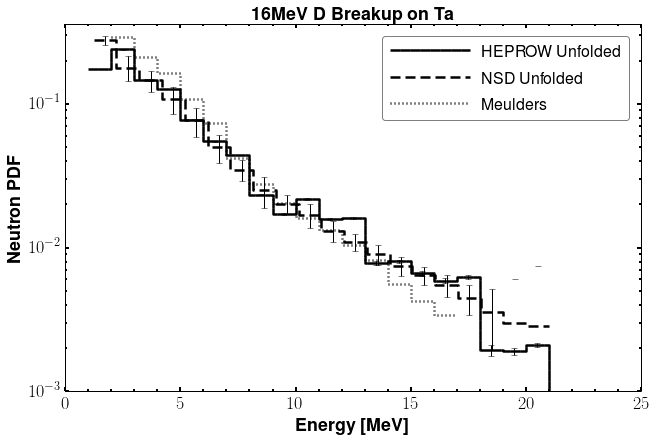

In [8]:
# Allow use of Tex sybols
plt.rc('text', usetex=True)

# Set up figure
#fig = plt.figure()
fig = plt.figure(figsize=(10,6))
#ax1 = fig.add_subplot(111)
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.85])

# Preset data set format scheme
s=10
linewidth=['2.5']
marker=['.','o','v','^','<','>','1','2','3','4','8','s','p','*','h','H','+','x','d','D']
linestyle=['-','--',':','-.']
dashes=[[10, 0.1],[10, 5, 10, 5],[10,2.5,1,2.5]]
minorLocator = MultipleLocator(1)

# Set Line color cycle
ax1.set_color_cycle(['k', 'k', 'k', 'k'])

# Set axes
ax1.axis([0, 25, 0.001, 1.5*max(heprowHisto.yValues)])
#ax1.set_xscale('log')
ax1.set_yscale('log')

# Set axes labels and plot title.
ax1.set_title('\\textbf{16MeV D Breakup on Ta}', fontsize=18, weight="bold")    
ax1.set_xlabel('\\textbf{Energy [MeV]}', fontsize=18, weight="bold")
ax1.set_ylabel('\\textbf{Neutron PDF}', fontsize=18, weight="bold")
ax1.tick_params(axis='both', which='major', labelsize=18, width=2)
ax1.tick_params(axis='both', which='minor', width=2)
ax1.xaxis.set_minor_locator(minorLocator)

# Add data set to plot
ax1.errorbar(heprowHisto.midPtX, heprowHisto.midPtY, yerr=heprowHisto.sigma, marker=None, linestyle='None')
ax1.plot(heprowHisto.xEdges, heprowHisto.yValues, linewidth=linewidth[0], linestyle=linestyle[0], 
         marker=None,label="HEPROW Unfolded", dashes=dashes[0]) 
ax1.errorbar(nsdHisto.midPtX, nsdHisto.midPtY, yerr=nsdHisto.sigma, marker=None, linestyle='None')
ax1.plot(nsdHisto.xEdges, nsdHisto.yValues, linewidth=linewidth[0], linestyle=linestyle[1], 
         marker=None,label="NSD Unfolded", dashes=dashes[1]) 
ax1.plot(meuldersHisto.xEdges, meuldersHisto.yValues, linewidth=linewidth[0], linestyle=linestyle[2], 
         label="Meulders") 
#ax1.plot(loneHisto.xEdges, loneHisto.yValues, linewidth=linewidth[0], linestyle=linestyle[3], 
#         label="Lone", dashes=dashes[2]) 


# Add and locate legend
leg = ax1.legend()
plt.legend(borderaxespad=0.75, loc=1, fontsize=16, handlelength=5, borderpad=0.5,\
            labelspacing=0.75, fancybox=True, framealpha=0.5, numpoints=1);

plt.show()

In [24]:
# Save the figure
#fig.savefig(meuldersPath+'16MeVTa_50.png', bbox_inches='tight')
fig.savefig(meuldersPath+'16MeVTa_1.png', bbox_inches='tight')

In [ ]:
#Scratch code:

eventTree->Draw("m_shape:m_amplitude>>(1024,0,70000,1024,0,35000)","","colz")

#draw psd
eventTree->Draw("(m_amplitude-m_shape)/m_amplitude:m_amplitude>>(1024,0,35000,1024,0,1)","","colz")

#view psd linear cuts
eventTree->Draw("(m_amplitude-m_shape)/m_amplitude:m_amplitude>>(1024,0,35000,1024,0,1)","(m_amplitude-m_shape)/m_amplitude>0.16","colz")

#generate phs with linear psd cuts
eventTree->Draw("m_amplitude>>phs","(m_amplitude-m_shape)/m_amplitude>0.16")

#gROOT.ProcessLine('eventTree->Draw("m_amplitude>>AmBeGamma(5000,0,35000)","(m_amplitude-m_shape)/m_amplitude<0.23*m_amplitude+0.01")')
gROOT.ProcessLine('eventTree->Draw("m_amplitude>>AmBeNeutron(5000,0,35000)","(m_amplitude-m_shape)/m_amplitude>0.23")')
gROOT.ProcessLine('f.Write()')

gROOT.ProcessLine('std::vector<TFile*> f')
for det in detectorIds:
    #gROOT.ProcessLine('f = new TFile("{0}AmBe_{1}_ls_{2}.root","update")'.format(path,runNum,det))
    gROOT.ProcessLine('f.push_back(new TFile("{0}AmBe_{1}_ls_{2}.root","update")'.format(path,runNum,det))
    gROOT.ProcessLine('.ls')
    gROOT.ProcessLine('eventTree->Draw("(m_amplitude-m_shape)/m_amplitude:m_amplitude>>(5000,0,35000,1024,0,1)","","colz")')
    pause()